In [117]:
#ingest data
import pandas as pd

#preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Combine preprocessing
from sklearn.compose import ColumnTransformer

#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

#Split the data into random train and test subsets
from sklearn.model_selection import train_test_split

import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns







In [100]:
# Load the data
data = pd.read_csv('./dataset/youtube.csv')

In [101]:
# Clean numeric columns
def clean_numeric_column(column):
    cleaned_column = []
    for value in column:
        if isinstance(value, str):
            if 'K' in value:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)) * 1000)
            elif 'M' in value:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)) * 1000000)
            elif 'B' in value:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)) * 1000000000)
            else:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)))
        else:
            cleaned_column.append(value)
    return cleaned_column

data['VIEWS'] = clean_numeric_column(data['VIEWS'])
data['TOTAL_NUMBER_OF_VIDEOS'] = clean_numeric_column(data['TOTAL_NUMBER_OF_VIDEOS'])
data['SUBSCRIBERS'] = clean_numeric_column(data['SUBSCRIBERS'])


In [102]:
data


,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799.0,274000000.0,5.098000e+10,Entertainment
1,#2,T-Series,21120.0,267000000.0,2.571600e+11,Music
2,#3,Cocomelon - Nursery Rhymes,1180.0,176000000.0,1.828800e+11,Kids
3,#4,SET India,138970.0,173000000.0,1.647100e+11,Entertainment
4,#5,✿ Kids Diana Show,1220.0,123000000.0,1.035000e+11,Kids
...,...,...,...,...,...,...
495,#496,Smile Family Spanish,563.0,20500000.0,7.630000e+09,Entertainment
496,#497,Marvel Entertainment,8970.0,20500000.0,6.010000e+09,Entertainment
497,#498,5-Minute Crafts DIY,6100.0,20500000.0,5.160000e+09,NaN
498,#499,SatoshiSea,4.0,20500000.0,1.550000e+06,NaN


In [103]:

# Features and target
X = data[['VIEWS', 'TOTAL_NUMBER_OF_VIDEOS', 'CATEGORY']]
y = data['SUBSCRIBERS']

In [104]:
#Define preprocessing steps for numerical and categorial features

numeric_features = ['VIEWS', 'TOTAL_NUMBER_OF_VIDEOS']
numeric_transformer = Pipeline(steps=[
   ('scaler', StandardScaler())
])
categorical_features = ['CATEGORY']
categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [106]:
#Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
   transformers=[
       ('num', numeric_transformer, numeric_features),
       ('cat', categorical_transformer, categorical_features)
   ])


In [36]:
# Model pipeline
#Random Forest Regression is a versatile machine-learning technique for predicting numerical values. 
#It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.
# model = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (350, 3)
Shape of y_train: (350,)


In [110]:
# Model pipeline
model = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('regressor', LinearRegression())  # Change to LinearRegression or any other regressor you want to use
])



In [112]:
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [114]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')




MAE: 10479972.940124974
MSE: 450880527708001.6
R-squared: 0.39223614652524286


In [115]:
# Predict the number of subscribers for each channel in the dataset
data['Predicted Subscribers'] = model.predict(X)

# Save the predictions to a new CSV file
data.to_csv('./dataset/Result_youtube_channels_with_predictions.csv', index=False)
print("Predictions saved to 'youtube_channels_with_predictions.csv'")


Predictions saved to 'youtube_channels_with_predictions.csv'


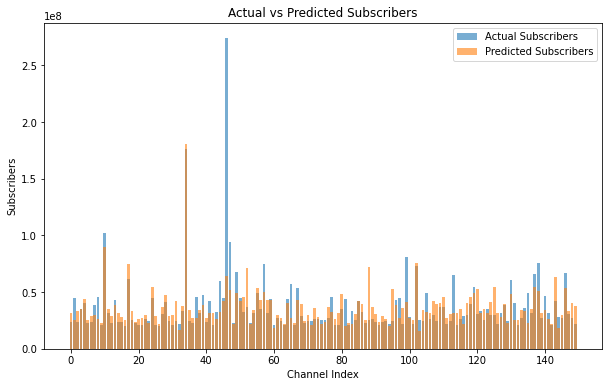

In [118]:
# Plotting
# Bar chart for actual vs predicted subscribers in the test set
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.6, label='Actual Subscribers')
plt.bar(range(len(y_test)), y_pred, alpha=0.6, label='Predicted Subscribers')
plt.xlabel('Channel Index')
plt.ylabel('Subscribers')
plt.title('Actual vs Predicted Subscribers')
plt.legend()
plt.show()


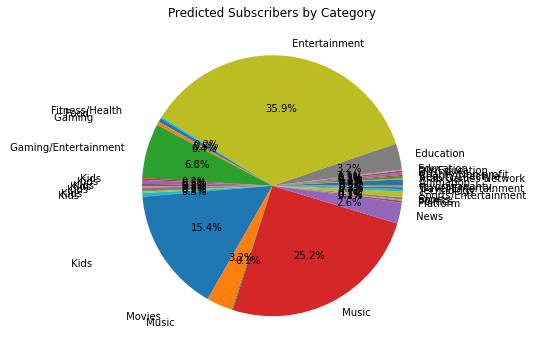

In [120]:
# Pie chart for the distribution of predicted subscribers by category
category_subscribers = data.groupby('CATEGORY')['Predicted Subscribers'].sum()
plt.figure(figsize=(10, 6))
category_subscribers.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Predicted Subscribers by Category')
plt.show()